# Linear SVM Classification

SVM classifier as fitting the widest possible street(represented by the parallel dashed lines) between the classes. This is called large margin classification.

**Notice**<br>
adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined(or "supported") by the instances located on the edge of the street. These instances are called the *support vector*

**SVMs are sensitice to the features scales**.

# Soft Margin Classification

The objective is to find a good balance between keeping the street as larage as possible and limiting the margin violations. This is called soft margin classification

In Scikit-Learn's SVM classes, we can control this balance using the C hyperparamter: a smaller C value leads to a wider street but more margin violations. Using a high C value the classifier makes fewer margin violations but ends up with a smaller margin

**If SVM model is overfitting, try regularizing it by reducing C**

**Trains a linear SVM model to detect Iris-Virginic flowers**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X= iris["data"][:,(2,3)] # petal length, petal width
y = (iris["target"]==2).astype(np.float64) #Iris-virginica

In [4]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

In [5]:
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1.])

**Unlike logistic Regression classifier, SVM classifiers do not output probabilities for each class**

# Nonlinear SVM Classification

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
))

In [9]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [10]:
def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize = 20, rotation=0)

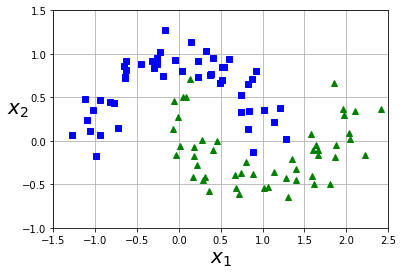

In [11]:
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])
plt.show()

In [12]:
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision, cmap = plt.cm.brg, alpha=0.1)


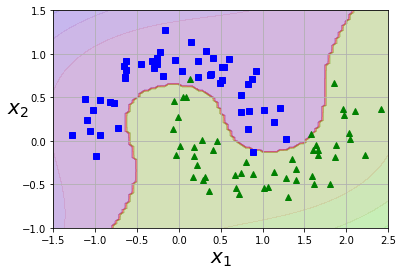

In [13]:
plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y, [-1.5,2.5, -1, 1.5])
plt.show()

## Polynomial Kernel

When using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick* 

The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

In [14]:
from sklearn.svm import SVC

In [15]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly",degree=3, coef0=1, C=5))
    
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [16]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

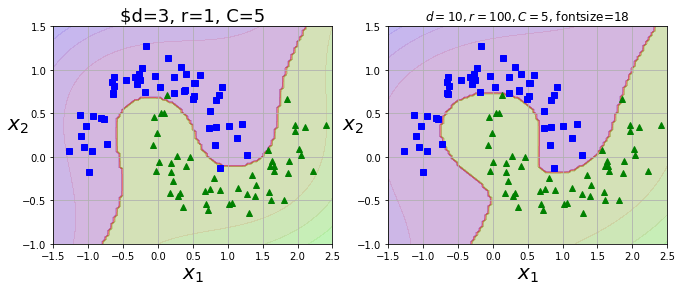

In [17]:
plt.figure(figsize=(11,4))
axes = [-1.5, 2.5,-1,1.5]
plt.subplot(121)
plot_prediction(poly_kernel_svm_clf, axes)
plot_dataset(X,y, axes)
plt.title(r"$d=3, r=1, C=5", fontsize=18)

plt.subplot(122)
plot_prediction(poly100_kernel_svm_clf, axes)
plot_dataset(X,y,axes)
plt.title(r"$d=10, r=100, C=5$, fontsize=18")

plt.show()

**A common approach to find the right hyperparmater values is to use grid search**

## Gaussian RBF kernel

In [18]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

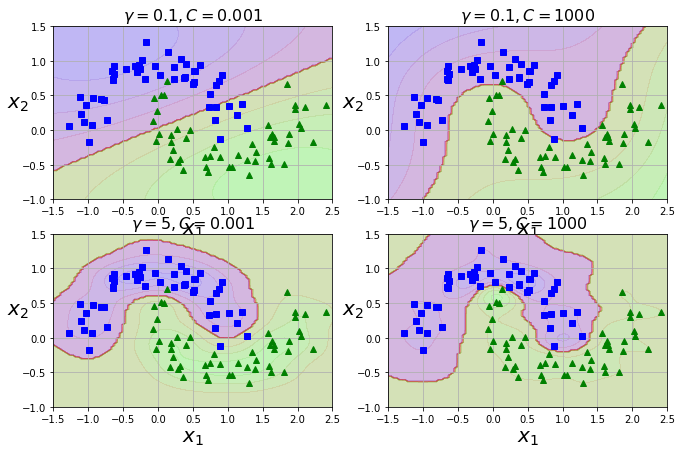

In [19]:
gamma1, gamma2 = 0.1, 5
C1 ,C2 = 0.001, 1000
hyperparams = (gamma1, C1),(gamma1, C2),(gamma2,C1),(gamma2,C2)

svm_clfs =[]

for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11,7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_prediction(svm_clf, axes)
    plot_dataset(X,y, axes)
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C={}$".format(gamma, C), fontsize=16)
    
plt.show()

# SVM Regression

Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instance as possible on the street while limiting margin violations. The width of the street is controlled by a hyperparameter $\epsilon$

Adding more training instance within the margin does not affect the model's predictions; thus model is said to be $\epsilon-insensitive$

In [20]:
np.random.seed(42)
m=50
X= 2*np.random.rand(m,1)
y = (4+3*X+np.random.randn(m,1)).ravel() #Return a contiguous flattened array.

In [21]:
from sklearn.svm import LinearSVR

In [22]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [23]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg, X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred)>=svm_reg.epsilon)
    return np.argwhere(off_margin) #Find the indices of array elements that are non-zero, grouped by element.

svm_reg1.support_ = find_support_vectors(svm_reg1, X,y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X,y)

eps_x1 =1
eps_y_pred = svm_reg1.predict([[eps_x1]])


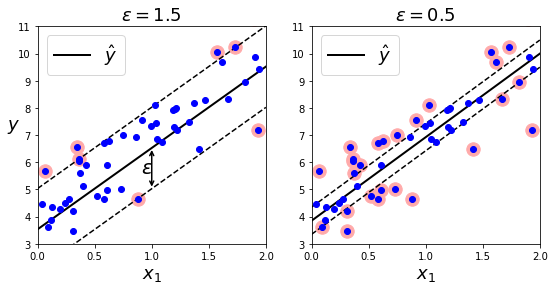

In [27]:
def plot_svm_regression(svm_reg, X,y, axes):
    x1s = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label =r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s =180, facecolors='#FFAAAA')
    plt.plot(X,y,"bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc = "upper left", fontsize=18)
    plt.axis(axes)
    
plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2,X,y,[0,2,3,11])
plt.title(r"$\epsilon={}$".format(svm_reg2.epsilon),fontsize=18)
plt.show()

In [28]:
from sklearn.svm import SVR

In [29]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Exercises

1. What is the fundamental idea behind Support Vecotor Machines?

The fundamental idea behind Support vector Machines is to fit the widest possible "street" betwwen the class. In other words, the goal is to have teh largest possible margin between teh dicision boundary that separates the two classes and the training instances.

When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two claesses and having the widest possible street(i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets.

2. What is support vector?

After training an SVM, a *support vector* is any instance located on the "street", including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector(i.e., off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won't affect the decision boundary. Computing the predictions only involves the support vectors, not the whole training set.

3. Why is it important to scale the inputs when using SVMs?

SVMs try to fit the largest possible "street" between the classes, so if the training set is not scaled, the SVM will tend to neglect small features

4. Can an SVM classifier output a confidence score when it classifier an instances? what about a probability?

An SVM classifier can output the distance between the test instance and the descision boundary, and you can use this as a confidence score. However, this score cannot be directly coverted into an estimation of the class probability. If you set probability = True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilites using Logistic Regression on the SVM's scores(trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

This question applies only to linear SVMs since kernelized can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between $m^2$ and $m^3$. So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.

6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set with millions of instances and hundreds of features? what about C?

7. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [31]:
from sklearn import datasets

In [32]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal lengh, petal width
y = iris["target"]

In [50]:
setosa_or_versicolor = (y==0)|(y==1)
X  = X[setosa_or_versicolor].astype("float64")
y = y[setosa_or_versicolor].astype("float64")

In [51]:
from sklearn.linear_model import SGDClassifier

In [54]:
C=5
alpha = 1/(C*len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                       max_iter = 100000, tol=-np.infty, random_state=42)
scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

lin_clf.fit(X_scaler,y)
svm_clf.fit(X_scaler,y)
sgd_clf.fit(X_scaler,y)

print("LinearSVC:       ", lin_clf.intercept_,lin_clf.coef_)
print("SVC:             ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f})".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

('LinearSVC:       ', array([0.28481271]), array([[1.05542343, 1.09851849]]))
('SVC:             ', array([0.31933577]), array([[1.1223101 , 1.02531081]]))
('SGDClassifier(alpha=0.00000)', array([0.314]), array([[1.1134587 , 1.03720087]]))


**Plot the decision boundaries of these three models:**

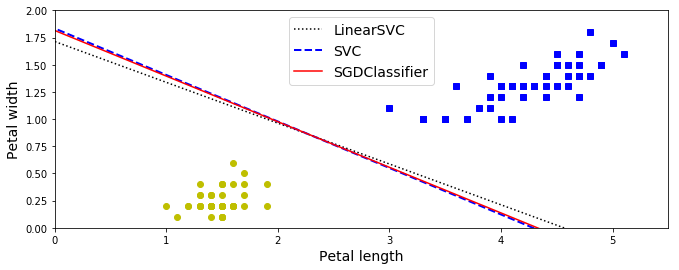

In [55]:
#Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0,0]/lin_clf.coef_[0,1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0,1]

w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

#Transform the decsision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

#Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

8. Train an SVM classifier on the MNIST dataset. Since SVM classifier are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed uo the process. what accuracy can you reach?

9. Train an SVM regressor on the California housing dataset